This notebook show how to plot data from three probes together in one tplot. When plotting with Pytplot, each tplot variable coorespond to one panel. If we want to plot data from three probes in one panel, a combined tplot variable is needed to store data from three probes together.

In [1]:
%pip install ipykernel

You should consider upgrading via the '/Users/jiashu/Documents/VScode/pyspedas_examples/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from pyspedas.themis import fgm
import pytplot

load THEMIS FGM data, we use fgs gsm data here

In [3]:
# Load THEMIS FGM data for THD, THE, and THA
fgm(probe='d', trange=['2021-07-10/01:00', '2021-07-10/02:10'], time_clip=True)
fgm(probe='e', trange=['2021-07-10/01:00', '2021-07-10/02:10'], time_clip=True)
fgm(probe='a', trange=['2021-07-10/01:00', '2021-07-10/02:10'], time_clip=True)

27-Sep-23 10:14:05: Downloading remote index: http://themis.ssl.berkeley.edu/data/themis/thd/l2/fgm/2021/
27-Sep-23 10:14:06: File is current: themis_data/thd/l2/fgm/2021/thd_l2_fgm_20210710_v01.cdf
27-Sep-23 10:14:22: Time clip was applied to: thd_fgs_btotal
27-Sep-23 10:14:22: Time clip was applied to: thd_fgs_gse
27-Sep-23 10:14:22: Time clip was applied to: thd_fgs_gsm
27-Sep-23 10:14:22: Time clip was applied to: thd_fgs_dsl
27-Sep-23 10:14:23: Time clip was applied to: thd_fgl_btotal
27-Sep-23 10:14:23: Time clip was applied to: thd_fgl_gse
27-Sep-23 10:14:24: Time clip was applied to: thd_fgl_gsm
27-Sep-23 10:14:24: Time clip was applied to: thd_fgl_dsl
27-Sep-23 10:14:25: Time clip was applied to: thd_fgl_ssl
27-Sep-23 10:14:26: Time clip was applied to: thd_fgh_btotal
27-Sep-23 10:14:26: Time clip was applied to: thd_fgh_gse
27-Sep-23 10:14:27: Time clip was applied to: thd_fgh_gsm
27-Sep-23 10:14:28: Time clip was applied to: thd_fgh_dsl
27-Sep-23 10:14:28: Time clip was appl

['tha_fgs_btotal',
 'tha_fgs_gse',
 'tha_fgs_gsm',
 'tha_fgs_dsl',
 'tha_fgl_btotal',
 'tha_fgl_gse',
 'tha_fgl_gsm',
 'tha_fgl_dsl',
 'tha_fgl_ssl',
 'tha_fgh_btotal',
 'tha_fgh_gse',
 'tha_fgh_gsm',
 'tha_fgh_dsl',
 'tha_fgh_ssl',
 'tha_fge_btotal',
 'tha_fge_gse',
 'tha_fge_gsm',
 'tha_fge_dsl',
 'tha_fge_ssl']

split_vec will split a vector into three component. e.g. thd_fgs_gsm will be splited into thd_fgs_gsm_x, thd_fgs_gsm_y, thd_fgs_gsm_z

In [4]:
# Split the 3D FGM data into individual components
pytplot.tplot_math.split_vec('thd_fgs_gsm')
pytplot.tplot_math.split_vec('the_fgs_gsm')
pytplot.tplot_math.split_vec('tha_fgs_gsm')

['tha_fgs_gsm_x', 'tha_fgs_gsm_y', 'tha_fgs_gsm_z']

In [5]:
# Join the Bx components from the three probes into one tplot variable
pytplot.store_data("combined_bx", data=['tha_fgs_gsm_x', 'the_fgs_gsm_x', 'thd_fgs_gsm_x'])

True

In [6]:
# Modify the options
pytplot.options('combined_bx', 'Color',['b','r','k'])
pytplot.options('combined_bx', 'legend_names', ['tha','the','thd'])
pytplot.options('combined_bx', 'ytitle', 'fgs Bx')
pytplot.options('combined_bx', 'ysubtitle', '[nT]')

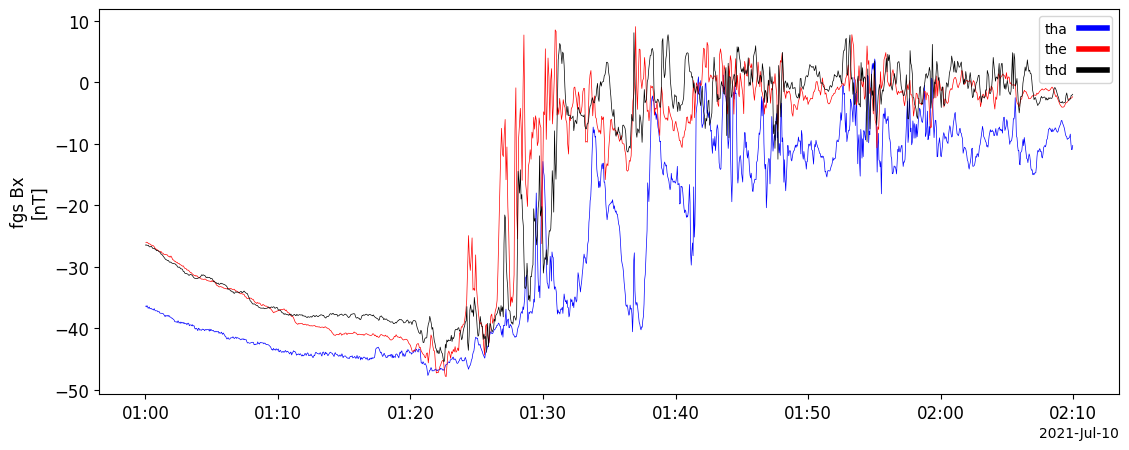

In [7]:
# Plot the tplot variable
pytplot.tplot('combined_bx')